In [5]:
%reset -f
import glob, os, sys, io
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
from wavhandler import *
from utils import *

import logging
logger = logging.getLogger()
logger.propagate = False
logger.setLevel(logging.ERROR)
np.random.seed(0)

smpl = 5
aedes = WavHandler('/home/yannis/data/insects/Potamitis/Wingbeats/Aedes', sample_size=smpl, recursive=True)
data, _ = read_simple(aedes.wav_filenames)

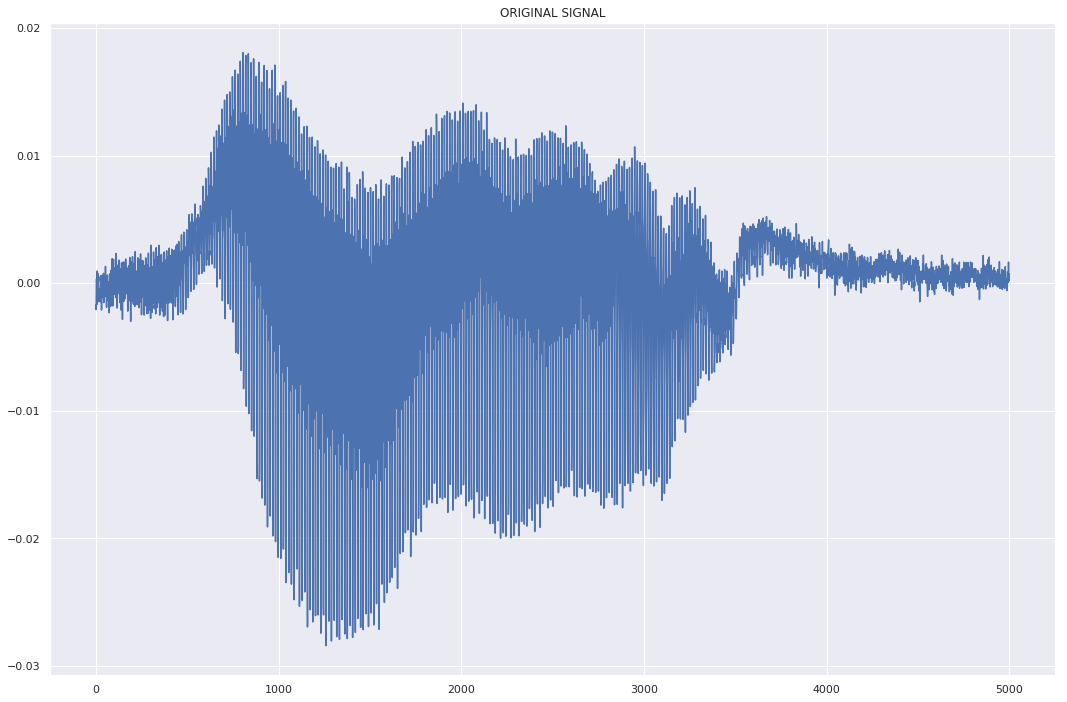

In [10]:
sig = data[:,4]
plt.figure(figsize=(18,12))
plt.title("ORIGINAL SIGNAL")
plt.plot(sig)

Text(0.5, 1.0, 'BUTTERSWORTH FILTERED')

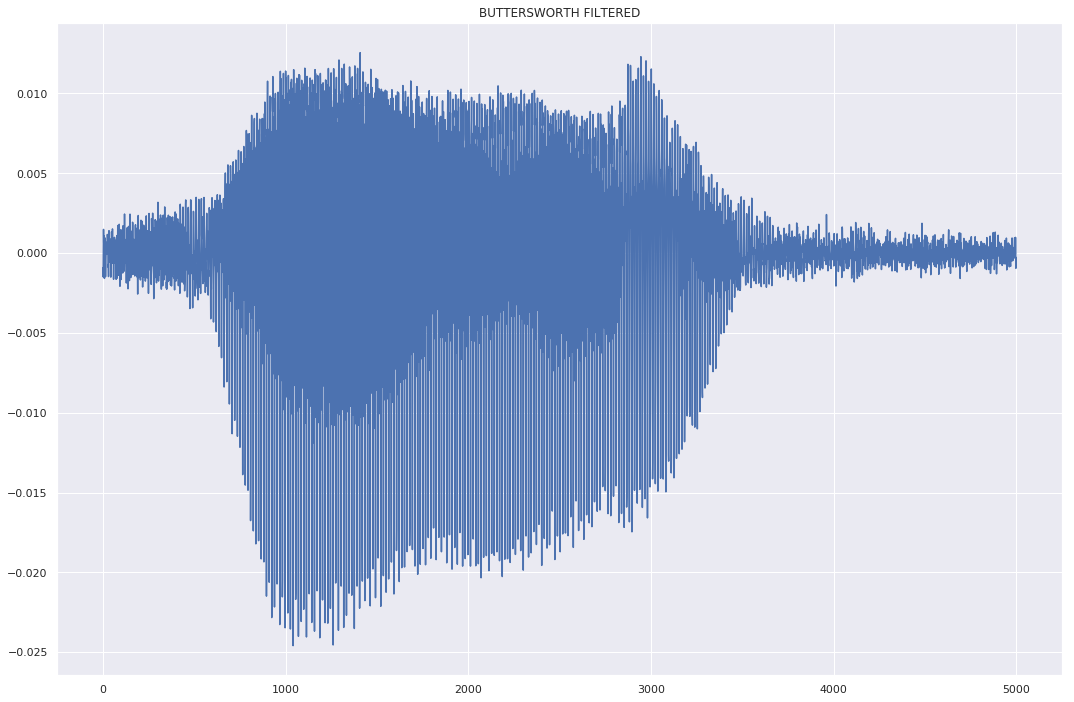

In [12]:
sig_filt = butter_bandpass_filter(data=sig, lowcut=L_CUTOFF, highcut=H_CUTOFF, fs=F_S, order=B_ORDER)
plt.figure(figsize=(18,12))
plt.plot(sig_filt)
plt.title('BUTTERSWORTH FILTERED')

In [13]:
crop_hz=2500

3600.0

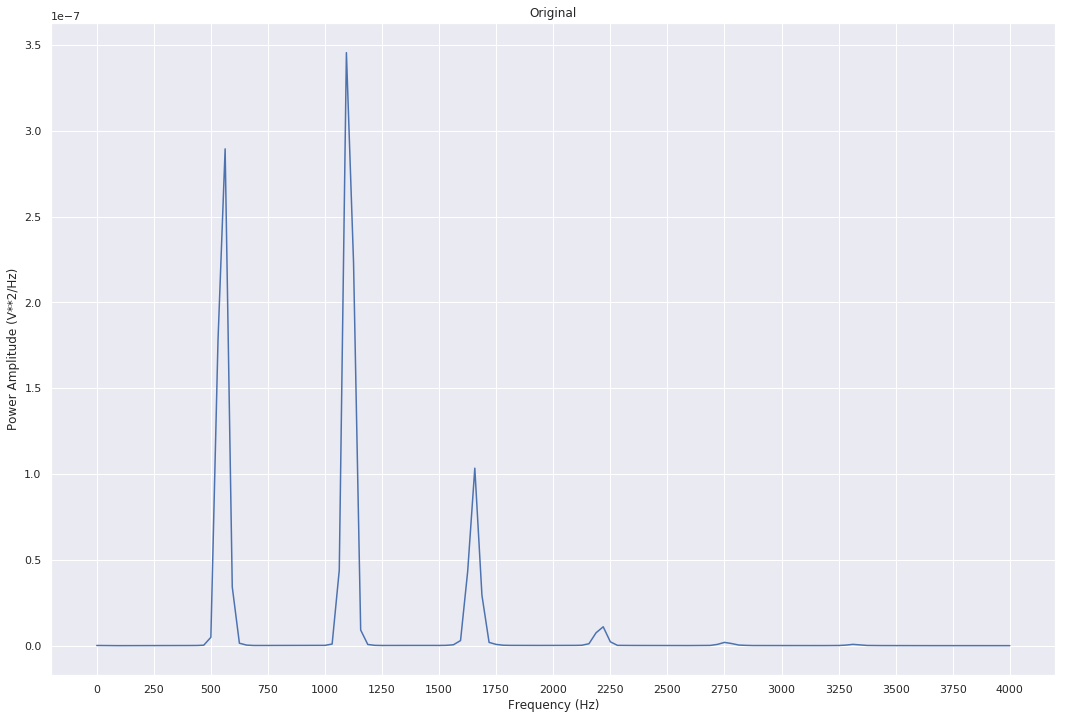

In [52]:
from scipy import signal as sg
from scipy.signal import find_peaks
from sklearn.preprocessing import normalize

# Calculating PSD
freqs, p_amps = sg.welch(sig_filt, fs=F_S, scaling='density', window='hanning', nperseg=256, nfft=None, noverlap=128+64)
plt.figure(figsize=(18,12))
plt.plot(freqs, p_amps)
plt.title('Original')
plt.ylabel('Power Amplitude (V**2/Hz)')
plt.xlabel('Frequency (Hz)')
plt.locator_params(axis='x', nbins=20)

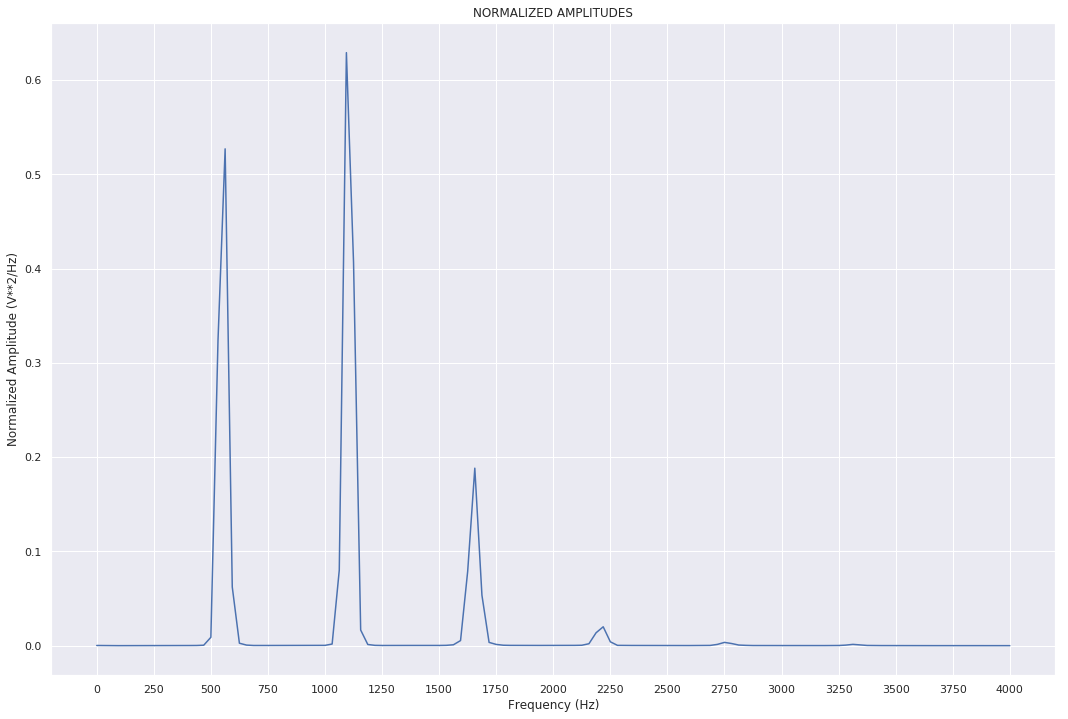

In [54]:
# Normalization of PSD amplitudes
p_amps = normalize(p_amps.reshape(-1,1), norm='l2', axis=0).reshape(-1,)
plt.figure(figsize=(18,12))

plt.plot(freqs, p_amps)
plt.title('NORMALIZED AMPLITUDES')
plt.ylabel('Normalized Amplitude (V**2/Hz)')
plt.xlabel('Frequency (Hz)')
plt.locator_params(axis='x', nbins=20)

In [58]:
psd = pd.concat([pd.Series(freqs), pd.Series(p_amps)], axis=1)
# Cropping up to 2500 Hz (mosquitos don't have more)
psd = psd.iloc[:crop_hz,:]
psd.columns = ['frequency','pow_amp']
psd.head()

,frequency,pow_amp
0,0.00,6.710929e-10
1,31.25,3.842583e-10
2,62.50,9.607550e-10
3,93.75,8.132555e-09
4,125.00,1.649150e-08


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128])